In [25]:
import psycopg2
import matplotlib.pyplot as plt

In [26]:
def get_conn():
    conn = psycopg2.connect (
        host     = "cc3201.dcc.uchile.cl",
        database = "cc3201",
        user     = "cc3201",
        password = "j'<3_cc3201",
        port     = "5440"
    )
    return conn

In [27]:
def time_cons(tamanno: int, optimizacion: str, anidada: bool):
    conn = get_conn()
    cur = conn.cursor()

    if anidada:
        consulta = f"""
            explain analyze
            select distinct pelicula.nombre, pelicula.anho
            from  {optimizacion}.pelicula{tamanno} as pelicula, {optimizacion}.personaje{tamanno} as personaje
            where pelicula.nombre = personaje.p_nombre
            and   pelicula.anho   = personaje.p_anho
            and   personaje.a_nombre in (
                select  personaje.a_nombre 
                from    {optimizacion}.pelicula{tamanno} as pelicula, {optimizacion}.personaje{tamanno} as personaje
                where   personaje.p_nombre = pelicula.nombre
                and     pelicula.nombre = 'Inception'
            );"""
    else:
        consulta = f"""
            explain analyze
            select distinct pelicula1.nombre, pelicula1.anho
            from    {optimizacion}.pelicula{tamanno} as pelicula1,
                    {optimizacion}.personaje{tamanno} as personaje1,
                    {optimizacion}.pelicula{tamanno} as pelicula2,
                    {optimizacion}.personaje{tamanno} as personaje2
            where pelicula1.nombre = personaje1.p_nombre
            and   pelicula1.anho   = personaje1.p_anho
            and   pelicula2.nombre = personaje2.p_nombre
            and   pelicula2.anho   = personaje2.p_anho
            and   pelicula2.nombre = 'Inception'
            and   personaje2.a_nombre = personaje1.a_nombre;
            """

    cur.execute(consulta)
    r = cur.fetchone()

    while (r):
        r = r[0]
        if("Planning Time" in r):
            p_time = r
        if("Execution Time" in r):
            e_time = r
        r = cur.fetchone()
    return  p_time, e_time

    conn.close()



In [28]:
ns = [100, 1000, 10000]

In [29]:
def get_result(optimizacion, anidado):
    y = []
    for n in ns:
        p_time, e_time = time_cons(n, optimizacion, anidado)
        print(str(n)+":"+" "*(6 - len(str(n))), p_time, e_time)

        p_time = p_time.replace("Planning Time: ", "").replace(" ms", "")
        e_time = e_time.replace("Execution Time: ", "").replace(" ms", "")

        y.append(float(p_time) + float(e_time))
    return y

consulta anidada optimizada


100:    Planning Time: 4.135 ms Execution Time: 22.476 ms
1000:   Planning Time: 5.292 ms Execution Time: 17.300 ms
10000:  Planning Time: 5.297 ms Execution Time: 11.156 ms


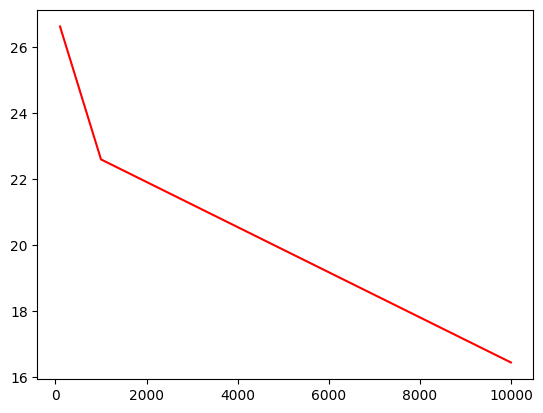

In [30]:
print("consulta anidada optimizada")
y = get_result("opti", True)
plt.plot(ns, y, label='Line', color='r', linestyle='-')
plt.show()

consulta no anidada optimizada
100:    Planning Time: 4.822 ms Execution Time: 21.817 ms
1000:   Planning Time: 5.818 ms Execution Time: 17.543 ms
10000:  Planning Time: 5.981 ms Execution Time: 10.881 ms


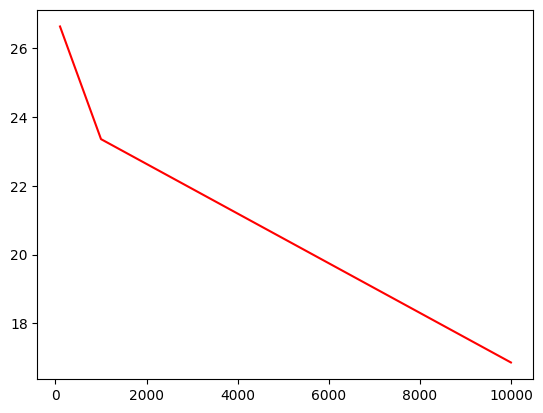

In [31]:
print("consulta no anidada optimizada")
y = get_result("opti", False)
plt.plot(ns, y, label='Line', color='r', linestyle='-')
plt.show()

consulta anidada no optimizada
100:    Planning Time: 3.100 ms Execution Time: 145.013 ms
1000:   Planning Time: 4.302 ms Execution Time: 75.882 ms
10000:  Planning Time: 2.807 ms Execution Time: 34.316 ms


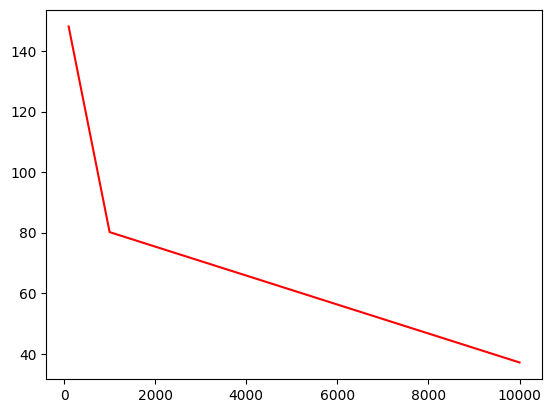

In [32]:
print("consulta anidada no optimizada")
y = get_result("opt", True)
plt.plot(ns, y, label='Line', color='r', linestyle='-')
plt.show()

consulta no anidada no optimizada
100:    Planning Time: 2.498 ms Execution Time: 142.803 ms
1000:   Planning Time: 4.736 ms Execution Time: 72.491 ms
10000:  Planning Time: 4.692 ms Execution Time: 38.204 ms


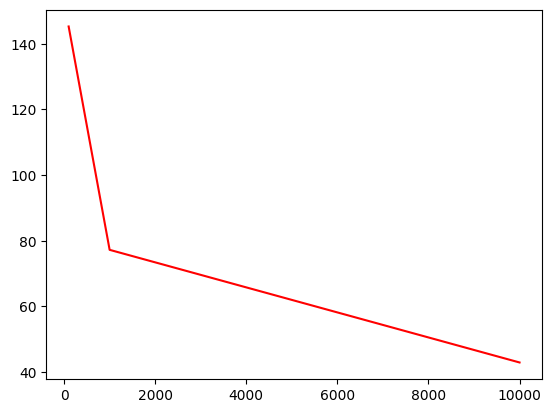

In [33]:
print("consulta no anidada no optimizada")
y = get_result("opt", False)
plt.plot(ns, y, label='Line', color='r', linestyle='-')
plt.show()